In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# Descarga de datos
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/' +
       'data/vic_elec_hourly.csv')
datos = pd.read_csv(url, sep=',')
datos['Time'] = pd.to_datetime(datos['Time'], format='%Y-%m-%d')
datos = datos.set_index('Time')
datos = datos.asfreq('1D')
datos = datos.sort_index()
datos['Holiday'] = datos['Holiday'].astype(int)
datos

In [63]:
datos = datos.loc['2012-01-02':'2014-12-21']

In [65]:
datos = datos.resample(rule='1W', closed='right', label ='right').agg({'Demand': 'sum', 'Temperature': 'mean', 'Holiday': 'mean'})

<AxesSubplot:xlabel='Time'>

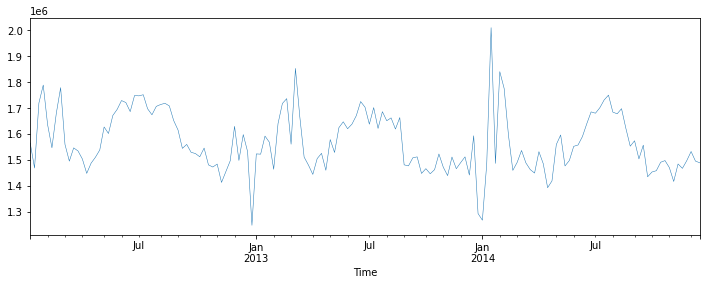

In [66]:
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 4))
datos.Demand.plot(ax=ax, label='train', linewidth=0.5);

In [67]:
datos.to_csv('vic_elec_weekly.csv')

In [84]:
# Descarga de datos
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv'
datos = pd.read_csv(url, sep=',')
datos['fecha'] = pd.to_datetime(datos['fecha'], format='%Y/%m/%d')
datos = datos.set_index('fecha')
datos = datos.rename(columns={'x': 'y'})
datos = datos.asfreq('MS')

datos['exog_1'] = datos.y.rolling(window=10, closed='right').mean() + 0.5
datos['exog_2'] = datos.y.rolling(window=5, closed='right').mean() + 0.7

datos=datos.dropna()

<AxesSubplot:xlabel='fecha'>

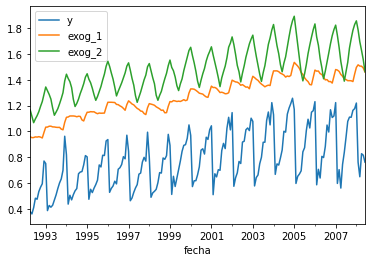

In [85]:
datos.plot();

In [ ]:
datos.to_csv('h2o_exog.csv')